<hr/>

# Introduction to Data Science - Fall 2021
**Jinchao Feng and Christian Kuemmerle** - introdsfall2021@jh.edu <br/>


- Principal Component Analysis: Motivation & Formulation

- Linear Algebra Recap
<hr/>

<h1><font color="darkblue">Principal Component Analysis</font></h1>

## Review: Statistical Learning

>|                | Supervised     |         Unsupervised     |
 |:---------------|:--------------:|:------------------------:|
 | **Discrete**   | Classification | Clustering               |   
 | **Continuous** | Regression     | Dimensionality Reduction |


## Aspects of Principal Component Analysis (PCA)

<!--<img src="files/800px-GaussianScatterPCA.png" width=300 align=left>-->
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/440px-GaussianScatterPCA.svg.png" width=300 align=topleft>

- Find low-dimensional representation of high-dimensional data.
   - Interpretability
   - Compression
- Linear data transformation
- Directions of maximal variance

### Example from Genetics

Identify relationship between geography and genetics from single-nucleotide polymorphism (SNP) data. <br>
See
  - [Paschou, Peristera, et al. "PCA-correlated SNPs for structure identification in worldwide human populations." PLoS genetics 3.9 (2007): e160.](https://journals.plos.org/plosgenetics/article?id=10.1371/journal.pgen.0030160)
  - [Slides](https://livejohnshopkins-my.sharepoint.com/:b:/g/personal/ckuemme1_jh_edu/EdhsuknNn5pAqnEMTQipojIBh12Xk3Ot9CRwGthikI3ToQ?e=gN5u8o)

## Review of Linear Algebra

Assume $n$ data points $\{x_1,\ldots,x_n\} \subset \mathbb{R}^D$ are given.

  - Define **data matrix** $X$:
  > $X = \begin{bmatrix} x_1 ,\dots, x_n \end{bmatrix} \in \mathbb{R}^{D \times n}$.
  
  - Let $\overline{X}:= \frac{1}{n}X \mathbf{1}\mathbf{1}^T = (\frac{1}{n} \sum_{i=1}^n (x_i)_j)_{j,\ell}$ be the matrix with row averages of $X$. <br>
   **Centered data matrix** $\widetilde{X}$:
  > $\widetilde{X} = X -\overline{X} \in \mathbb{R}^{D \times n}$.
  - **Sample covariance matrix** $C$:
  >$\displaystyle C =  \frac{1}{n\!-\!1}\widetilde{X}\widetilde{X}^T =  \frac{1}{n\!-\!1}\ (X- \overline{X})(X- \overline{X})^T = \frac{1}{n\!-\!1}\  \sum_{i=1}^n (x_i- \overline{x}) (x_i- \overline{x})^T \in \mathbb{R}^{D \times D}$

### Eigenvalues & Eigenvectors

- $\lambda \in \mathbb{R}$ is an **eigenvalue** of $C \in \mathbb{R}^{D \times D}$ and $e \in \mathbb{R}^{D} \setminus \{0\}$ is **eigenvector** of $C$ if 
> $$ C e = \lambda e. $$

- If $\{e_1,e_2,\ldots,e_{D}\}$ are a basis of $\mathbb{R}^D$ (in particular, if they are linear independent), then there exists an **eigendecomposition**. <br>
In this case, if $\lambda_1\geq\lambda_2\geq\dots\geq\lambda_D\geq{}0$ are the eigenvalues of $C$ and ${e}_1,\dots,{e}_D$ the corresponding eigenvectors, the eigendecomposition can be written as
> $\displaystyle  C  = \sum_{i=1}^D\ \lambda_i\left({e}_i\,{e}_i^T\right) = \begin{bmatrix} | & & | \\e_1,& \dots,& e_D \\ |& & | \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 & 0 \\ 
0& \ddots &0 \\ 0 & 0& \lambda_{D} \end{bmatrix} \begin{bmatrix} - & e_1^T& -  \\ & \dots & \\ - & e_D^T  & - \end{bmatrix} = E\ \Lambda\ E^T.$  <br>
> $\Lambda$ is diagonal.
>

- The matrix $E \in \mathbb{R}^{D \times D}$ with eigenvectors in its columns is **orthogonal**, i.e.,
> $$E^T E = E E^T =  I$$ (or $E^{-1} = E^T$).

> With diagonal $\Lambda$ matrix of the eigenvalues and an $E$ matrix of $[{e}_1, \dots, {e}_N]$
><br/><br/>
> $\displaystyle  C = E\ \Lambda\ E^T$

### Singular Value Decomposition (SVD)

One advantage: Is useable for non-square matrices such as the data matrices $X$ or $\widetilde{X}$.

- For each matrix $X \in \mathbb{R}^{D \times n}$, there is a **singular value decomposition** such that (without loss of generality, $D < n$)
> $\displaystyle  X  = \sum_{i=1}^{D} \ \sigma_i\left({u}_i\,{v}_i^T\right) = \begin{bmatrix} | & & | \\u_1,& \dots,& u_D \\ |& & | \end{bmatrix} \begin{bmatrix} \sigma_1 & 0 & 0 &0  \\ 
0& \ddots &0 &0 \\ 0 & 0& \sigma_{D} & 0 \end{bmatrix} \begin{bmatrix} - & v_1^T& -  \\ & \dots & \\ - & v_n^T  & - \end{bmatrix} = U \Sigma V^T$ <br><br>
> where $\Sigma$ is diagonal, $V^T V=I$ and $U^T U = I$, and $\sigma_1 \geq \sigma_2 \geq \ldots \geq \sigma_D \geq 0$ (**singular values**).
  - Columns $u_i \in \mathbb{R}^{D}$ of $U$ are called **left singular vectors** of $X$, <br>
  - Columns $v_i \in \mathbb{R}^{n}$ of $V$ are called **right singular vectors** of $X$.

#### Linear algebra in action

- We generate $n$ points in $D=2$ sampled as i.i.d. standard Gaussians. Their $x$-coordinates are streched by a factor $4$, and their location is subsequently rotated by $45°$, after which a shift by $(1,3)$ is applied. This gives rise to the data matrix $X \in \mathbb{R}^{2 \times n}$.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


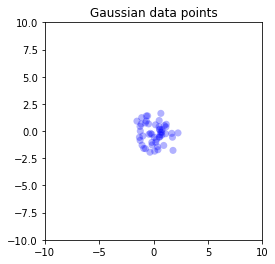

In [2]:
from scipy.stats import norm
n = 50
D = 2
# generate multiple 2-D (column) vectors
N = norm.rvs(0,1,(D,n))

figure(figsize=(4,4)); xlim(-10,10); ylim(-10,10); title('Gaussian data points')
scatter(N[0,:],N[1,:], marker='o',color='b', s=50, alpha=0.3, edgecolor='none')
plt = gca()
plt.set_aspect('equal');

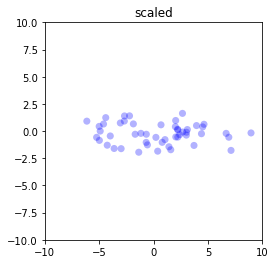

In [5]:
# copy and scale the data set
S = np.copy(N)
S[0,:] *= 4  # scale axis 0 ("x-axis")
#S[0,:] = 4*S[0,:]  # alternatively
figure(figsize=(4,4)); xlim(-10,10); ylim(-10,10);title('scaled')
scatter(S[0,:],S[1,:], marker='o',color='b', s=50, alpha=0.3, edgecolor='none');
ax = gca()
ax.set_aspect('equal');

In [7]:
# rotate the data set by 45 degrees
f = +pi/4    
R = array([[cos(f), -sin(f)],
           [sin(f),  cos(f)]]) # rotation matrix
print(R.shape)
print(S.shape)

(2, 2)
(2, 50)


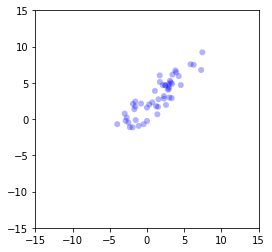

In [8]:
X = R@S  # matrix multiplication with rotation matrix
X += np.array([[1],[3]]) # shift
figure(figsize=(4,4)); xlim(-15,15); ylim(-15,15);
scatter(X[0,:],X[1,:],marker='o',color='b',alpha=0.3, edgecolor='none')

In [10]:
# subtract sample mean
avg = mean(X, axis=1).reshape(X[:,1].size,1)
Xtilde = X - avg
# sample covariance matrix
C = Xtilde.dot(Xtilde.T) / (n-1) 
print ("Sample averages\n", avg)
print ("Sample covariance matrix\n",C)

Sample averages
 [[1.4062044 ]
 [3.08754792]]
Sample covariance matrix
 [[7.56741414 6.35059653]
 [6.35059653 6.87286886]]


In [11]:
 # compare with numpy function
(np.cov(X),C)

(array([[7.56741414, 6.35059653],
        [6.35059653, 6.87286886]]),
 array([[7.56741414, 6.35059653],
        [6.35059653, 6.87286886]]))

In [14]:
# eigen decomposition of sample covariance matrix
L, E = np.linalg.eig(C)
print("Eigenvalues:\n",L)
print("Eigenvector matrix:\n",E)

Eigenvalues:
 [13.58022597  0.86005702]
Eigenvector matrix:
 [[ 0.7261549  -0.68753113]
 [ 0.68753113  0.7261549 ]]


In [13]:
# compute singular value decomposition
U, W, V = np.linalg.svd(C)
print("Singular values:\n",W)
print("Left singular vector matrix:\n",U)
print("Right singular vector matrix:\n",V)

Singular values:
 [13.58022597  0.86005702]
Left singular vector matrix:
 [[-0.7261549  -0.68753113]
 [-0.68753113  0.7261549 ]]
Right singular vector matrix:
 [[-0.7261549  -0.68753113]
 [-0.68753113  0.7261549 ]]


Up to potential reordering of columns, SVD and eigendecomposition of $C$ the same (since $C$ is symmetric and positive definite).

In [15]:
# check orthogonality properties
print(E.dot(E.T))
print(U.dot(U.T))

[[1. 0.]
 [0. 1.]]
[[1.0000000e+00 4.9411052e-18]
 [4.9411052e-18 1.0000000e+00]]


In [16]:
np.allclose( E.T, np.linalg.inv(E) ) # alternative way to do this

True

If $X = U \Sigma V^T$ is a singular value decomposition of a _centered_ data matrix $X$ and 
 $C = \frac{1}{n\!-\!1}X X^T$ its sample covariance matrix, we can very closely relate the singular value decomposition of $X$ with the eigendecomposition of $C$:

>$\displaystyle E\Lambda E^T = C = \frac{1}{n\!-\!1} X X^T =  \frac{1}{n\!-\!1} U \Sigma V^T V \Sigma^T U  = \frac{1}{n\!-\!1} U \Sigma \Sigma^T U  = \frac{1}{n\!-\!1} U \Sigma^2 U.$ <br><br>
> Due to uniqueness of the SVD and orthogonality of $U$ and $E$, we have 
>$$\displaystyle \displaystyle \Lambda = \frac{1}{n\!-\!1}\  \Sigma^2 $$
and 
>$$ U = E $$
>(up to reordering of columns / eigenvalues, so that eigenvalues of $C$ in $\Lambda$ are in non-increasing order).

In [17]:
UX, W, VX = np.linalg.svd(Xtilde) # take here Xtilde as X, since Xtilde was centered
UX, W**2 / (X[0,:].size-1)

(array([[-0.7261549 , -0.68753113],
        [-0.68753113,  0.7261549 ]]),
 array([13.58022597,  0.86005702]))

In [ ]:
np.allclose(U,UX) # the two ways of how to compute U indeed coincide.

## Principal Component Analysis (PCA)

<img src=files/PCA_2D_illustration.png align=left width=800>
<br><br>

### PCA as Directions of Maximal Variance

Assume now we are given a data matrix $X = \begin{bmatrix} x_1 ,\dots, x_n \end{bmatrix} \in \mathbb{R}^{D \times n}$ as above, which is centered, i.e., $\overline{X} = 0$. If $X'$ is the empirical distribution of the data matrix, the **first principal direction** $u_1 \in \mathbb{R}^D$ can be computed as the **direction of maximal variance** of $X'$.
- Since $X$ is centered, $\mathbb{E}\left[X'\right]=0$, and furthermore for any $u \in \mathbb{R}^D$

> $\displaystyle \mathbb{Var}[u^T X'] = \mathbb{E}\left[(u^T X')(X'^T u)\right] = u^T\mathbb{E}\left[X'X'^T\right]\,u = \frac{1}{n} u^T \sum_{i=1}^n x_i x_i^T u = \frac{1}{n} u^T X X^T u  = \frac{n-1}{n}u^T C u $
><br/><br/>

- Therefore, in order to maximize $\mathbb{Var}[u^T X']$, we need to maximize $\frac{n-1}{n}u^T C u $ (or equivalently, $u^T C u $) over $u$.

- We add the constraint $u^2\!=\!1$ for normalization!

### Constrained Optimization

- **Lagrange multiplier**: extra term with new parameter $\lambda$

> $\displaystyle  \hat{u} = \arg\max_{u\in{}\mathbb{R}^D} \left[u^T C\,u - \lambda\,(u^2\!-\!1)\right]$

- Partial derivatives vanish at optimum

> $\displaystyle \frac{\partial}{\partial\lambda} \rightarrow\ \  \hat{u}^2\!-\!1 = 0\ \ $  (duh!)
><br/><br/>
> $\displaystyle \frac{\partial}{\partial u_k} \rightarrow\ \  $?

### With indices


> $\displaystyle \max_{u\in{}\mathbb{R}^D}  \left[ \sum_{i,j} u_i C_{ij} u_j - \lambda\,\left(\sum_i u_i^2 - 1\right) \right]$

- Partial derivatives $\partial \big/ \partial u_k$ vanish at optimum

> $\displaystyle \sum_{i,j} \frac{\partial u_i}{\partial u_k} C_{ij} u_j + \sum_{i,j} u_i C_{ij} \frac{\partial u_j}{\partial u_k} - 2\lambda\,\left(\sum_i u_i \frac{\partial u_i}{\partial u_k}\right)  $ 
> $=\displaystyle \sum_{i,j} \delta_{ik} C_{ij} u_j + \sum_{i,j} u_i C_{ij} \delta_{jk} - 2\lambda\,\left(\sum_i u_i \delta_{ik}\right)  $ 
> $=\displaystyle \sum_{j} C_{kj} u_j + \sum_{i} u_i C_{ik}  - 2\lambda\,u_k $


### And back again...

- With vectors and matrices

> $\displaystyle  C \hat{u} + C^T\hat{u} - 2\lambda \hat{u} = 0$
><br/><br/>
> but $C$ is symmetric 
><br/><br/>
> $\displaystyle  C\,\hat{u} = \lambda\,\hat{u} $

- We have now recovered an eigenvalue problem! See eigendecomposition above.

### Result

- The value of maximum variance is

> $\displaystyle  \hat{u}^TC\,\hat{u} = \hat{u}^T \lambda\,\hat{u} = \lambda\, \hat{u}^T\hat{u} = \lambda$
><br/><br/>
> the largest eigenvalue $\lambda_1$

- The direction of maximum variance is the corresponding eigenvector $u_1$

> $\displaystyle  Cu_1 = \lambda_1 u_1 $

- The vector $u_1 \in \mathbb{R}^D$  is the **1st principal component (or 1st principal direction)**.




### Principal Component Analysis: The Method

To perform PCA, we fix an integer $k \leq D$, the number of principal directions we are looking for.

The principal directions $u_1,u_2,\ldots,u_k \in \mathbb{R}^{D}$ are designed to maximize the variance of the data set, but also to be orthogonal to each other, i.e. 
<br><br>
$$u_i^T u_j = 1 \text{ if and only if }i = j, \text{ and else }=0.$$ <br>.
Thus, we maximize 
> $\displaystyle \mathbb{Var}[U_k^T X']$
with $U_k = \begin{bmatrix}u_1, & \ldots,& u_k \end{bmatrix}$ under the constraint that <br><br>
$$ U_k^T U_k = I.$$

This correspond to just finding the largest $k$ eigenvectors of the sample covariance matrix $C$.

### PCA 



- The eigenvectors of largest eigenvalues capture the most variance

> If keeping only $k<D$ eigenvectors, the best approximation is taking the first $k$ PCs
><br/><br/>
> $\displaystyle  C \approx \sum_{i=1}^k\ \lambda_i\left({e}_i\,{e}_i^T\right) =  E_k\Lambda_k E_k^T$





### New Coordiante System

- The $E$ matrix of eigenvectors is a rotation, $E\,E^T = I$

> $\displaystyle  Z = E^T\, X $


- A truncated set of eigenvectors $E_k$ defines a projection

> $\displaystyle  Z_k = E_k^T\, X  \in \mathbb{R}^{k \times n}$
><br/><br/>
> and
><br/><br/>
> $\displaystyle  X_k = E_k Z_k = E_k E_k^T\, X = P_k\,X $




### Detour: Projections

- If the square of a matrix is equal to itself

> $\displaystyle  P^2 = P $

- For example, projecting on the ${e}$ unit vector

<img src=files/Y7Gx8.png align=right width=250>

> Scalar times vector
><br/><br/>
> $\displaystyle  r' = {e}\left({e}^T r\right) = {e}\,\beta_r$
><br/><br/>
> Or  projection of vector $r$
><br/><br/>
> $\displaystyle  r' = \left({e}\,{e}^T\right)r = P\,r$




In [20]:
# principle components from sklearn
from sklearn import decomposition
# object-oriented interface
pca = decomposition.PCA(n_components=X[:,0].size)
# sklearn uses a different convention
pca.fit(X.T) # note the transpose
# pca.transform(X.T)
print (pca.components_.T, pca.explained_variance_)

[[ 0.7261549  -0.68753113]
 [ 0.68753113  0.7261549 ]] [13.58022597  0.86005702]


In [18]:
X.shape

(2, 50)

In [19]:
X.T.shape

(50, 2)

In [30]:
# singular value decomposition of data matrix yields also the same
# (be careful: this is only true if data matrix X is centered! Since it is not above, we use Xtilde here)
U, W, V = np.linalg.svd(Xtilde)
U, W**2 / (X[0,:].size-1)

(array([[-0.7261549 , -0.68753113],
        [-0.68753113,  0.7261549 ]]),
 array([13.58022597,  0.86005702]))

In [ ]:
# use to yield results without bessel correction
print (U, W**2 / X[0,:].size)

In [ ]:
# rotation
C = X.dot(X.T) / (X[0,:].size-1) 
E, L, E_same = np.linalg.svd(C)
A = E.T.dot(X);
figure(figsize=(5,5)); xlim(-10,10); ylim(-10,10);
scatter(A[0,:],A[1,:],marker='o',s=50,alpha=0.3,edgecolor='none');

In [ ]:
# projected points
P = E[:,:1].dot(E[:,:1].T).dot(X) # alternatively: P = E[:,:1] @ E[:,:1].T @ X

figure(figsize=(5,5)); xlim(-10,10); ylim(-10,10);
scatter(X[0,:],X[1,:],marker='o',color='b', s=50, alpha=0.3, edgecolor='none');
scatter(P[0,:],P[1,:],marker='o',color='r', s=50, alpha=0.3, edgecolor='none');

### Whitening
- Frequently used to preprocess data, e.g., in signal processing

>$ \displaystyle Z = \Lambda^{-1/2}\ E^T\ X$

- **Unhomework:** Verify that its covariance matrix is identity

In [ ]:
# calc and plot whitened coordinates
B = np.diag(1/np.sqrt(L)).dot(A)
figure(figsize=(5,5)); xlim(-5,5); ylim(-5,5);
scatter(B[0,:],B[1,:], marker='o',color='b', s=50, alpha=0.3, edgecolor='none');

In [ ]:
# cf. original normal randoms in cell [2]
figure(figsize=(11,5)); 
subplot(1,2,1).set_aspect('equal'); xlim(-5,5); ylim(-5,5); title('whitened')
scatter(B[0,:],B[1,:], marker='o',color='b', s=50, alpha=0.3, edgecolor='none');
subplot(1,2,2).set_aspect('equal'); xlim(-5,5); ylim(-5,5); title('original')
scatter(N[0,:],N[1,:], marker='o',color='b', s=50, alpha=0.3, edgecolor='none');